In [1]:
import os, sys
import numpy as np
# Go one level up and add it to sys.path such tah DarkAges can be found.
darkpath = os.path.dirname(os.path.abspath(os.curdir))
sys.path.insert(1,darkpath)
from DarkAges.evaporator import PBH_F_of_M as F_of_M
from DarkAges.evaporator import get_temperature_from_mass, get_mass_from_temperature

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.rc('text', usetex=True)
plt.rc('text.latex', unicode=True)
plt.rc('font', family='sans serif')

pgf_with_custom_preamble = {
	"font.family": "sans serif",
	"text.usetex": True,
	"text.latex.unicode": True,
	"pgf.rcfonts": False
}

In [3]:
widths = np.asarray([0.010, 0.025, 0.050, 0.100, 0.250, 0.500])
lams = np.asarray([100,200,300,500,1000])
masses = 10**np.linspace(12,20,1000)

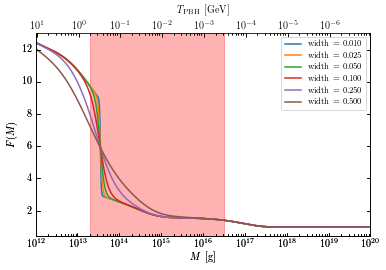

In [4]:
fig = plt.figure(1)
plt.subplots_adjust(bottom=0.175)
ax = host_subplot(111, axes_class=AA.Axes)
#x.set_title('PBH / Effective d.o.f. $F(M)$', fontsize='large')
ax.set_xlabel(u'$M\;\\left[\\mathrm{g}\\right]$', fontsize='large')
ax.set_xlim(masses.min(), masses.max())
ax.set_xscale('log')
ax.set_ylabel(u'$F(M)$', fontsize='large')
ax.set_yscale('linear')

for width in widths:
    options = {'QCD_width':width}
    F = lambda m: F_of_M(m,'ALL',**options)
    ax.plot(masses,F(masses),label='width = {:.3f}'.format(width))
    
ax.axvspan(2e13, 10.0**16.5, color='red',alpha=.3)

ax2 = ax.twiny()

#offset = 40
#new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
#ax2.axis["top"] = new_fixed_axis(loc="bottom",
#                                    axes=ax2,
#                                    offset=(0, -offset))
ax2.axis["top"].toggle(all=True)
#ax2.axis["top"].major_ticklabels.set_visible(False)
ax2.set_xlabel(u'$T_\\mathrm{PBH}\;\\left[\\mathrm{GeV}\\right]$', fontsize='large')

ax_limits = sorted([get_temperature_from_mass(lim) for lim in ax.get_xlim()])
xticks2 = matplotlib.ticker.LogLocator(subs=(1.0,)).tick_values(*ax_limits)
xtick2loc = np.vectorize(get_mass_from_temperature).__call__(xticks2)
ax2.set_xscale('log')
ax2.set_xticks(list(xtick2loc))
ax2.set_xbound(ax.get_xbound())

from matplotlib.ticker import FixedFormatter
ax2.xaxis.set_major_formatter(FixedFormatter(["$10^{%g}$" % np.log10(righttick) for righttick in xticks2]))

handles, labels = ax.get_legend_handles_labels()
#ax.grid('on')
lgd = ax.legend(handles, labels, loc='upper right', framealpha=.75,fontsize='small')

#fig.savefig('./PBH_F.pdf')
#fig.savefig('./PBH_F.pgf')

plt.show()

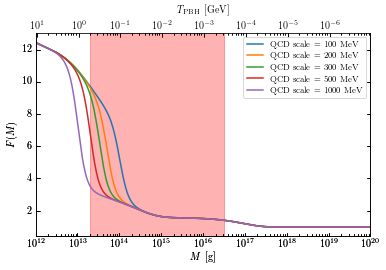

In [5]:
fig = plt.figure(1)
plt.subplots_adjust(bottom=0.175)
ax = host_subplot(111, axes_class=AA.Axes)
#x.set_title('PBH / Effective d.o.f. $F(M)$', fontsize='large')
ax.set_xlabel(u'$M\;\\left[\\mathrm{g}\\right]$', fontsize='large')
ax.set_xlim(masses.min(), masses.max())
ax.set_xscale('log')
ax.set_ylabel(u'$F(M)$', fontsize='large')
ax.set_yscale('linear')

for lam in lams:
    options = {'QCD_lambda':lam/1e3}
    F = lambda m: F_of_M(m,'ALL',**options)
    ax.plot(masses,F(masses),label='QCD scale = {:d} MeV'.format(lam))
    
ax.axvspan(2e13, 10.0**16.5, color='red',alpha=.3)

ax2 = ax.twiny()

#offset = 40
#new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
#ax2.axis["top"] = new_fixed_axis(loc="bottom",
#                                    axes=ax2,
#                                    offset=(0, -offset))
ax2.axis["top"].toggle(all=True)
#ax2.axis["top"].major_ticklabels.set_visible(False)
ax2.set_xlabel(u'$T_\\mathrm{PBH}\;\\left[\\mathrm{GeV}\\right]$', fontsize='large')

ax_limits = sorted([get_temperature_from_mass(lim) for lim in ax.get_xlim()])
xticks2 = matplotlib.ticker.LogLocator(subs=(1.0,)).tick_values(*ax_limits)
xtick2loc = np.vectorize(get_mass_from_temperature).__call__(xticks2)
ax2.set_xscale('log')
ax2.set_xticks(list(xtick2loc))
ax2.set_xbound(ax.get_xbound())

from matplotlib.ticker import FixedFormatter
ax2.xaxis.set_major_formatter(FixedFormatter(["$10^{%g}$" % np.log10(righttick) for righttick in xticks2]))

handles, labels = ax.get_legend_handles_labels()
#ax.grid('on')
lgd = ax.legend(handles, labels, loc='upper right', framealpha=.75,fontsize='small')

#fig.savefig('./PBH_F.pdf')
#fig.savefig('./PBH_F.pgf')

plt.show()

In [6]:
from DarkAges import transfer_functions
from DarkAges.model import evaporating_model as model
from DarkAges.transfer import transfer_combine
total_transfer = transfer_combine(*transfer_functions)

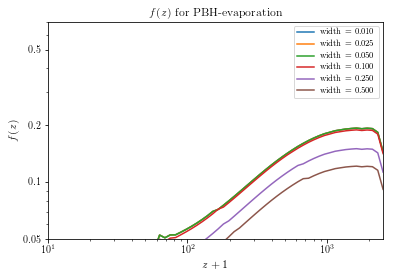

In [13]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.set_title('$f(z)$ for PBH-evaporation', fontsize='large')
ax.set_xlabel(u'$z+1$', fontsize='large')
ax.set_xlim(10,2500)
ax.set_xscale('log')
ax.set_ylabel(u'$f(z)$', fontsize='large')
ax.set_yscale('log')
ax.set_ylim(0.05,0.7)
ax.yaxis.set_minor_locator(ticker.LogLocator(subs=[3,4,6,7,8,9]))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(subs=[1,2,5]))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.1g$'))


#for lam in lams:
#    options = {'QCD_lambda':lam/1e3}
#    fz  = model(1e14,**options).calc_f(total_transfer)
#    ax.plot(*fz[:,:-1],label='QCD scale = {:d} MeV'.format(lam))
    
for width in widths:
    options = {'QCD_width':width}
    fz  = model(1e14,**options).calc_f(total_transfer)
    ax.plot(*fz[:,:-1],label='width = {:.3f}'.format(width))

handles, labels = ax.get_legend_handles_labels()
#ax.grid('on')
lgd = ax.legend(handles, labels, loc='upper right', framealpha=.75,fontsize='small')

#fig.savefig('./PBH_F.pdf')
#fig.savefig('./PBH_F.pgf')

plt.show()